# MULTIPLE LINEAR REGRESSION
### Objective :
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [2]:
# Set up environment configurations
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline


In [3]:
# Load and display the dataset
df = pd.read_csv(r"https://raw.githubusercontent.com/rohitmaind/ExcelR_Assignments/main/Datasets/ToyotaCorolla%20-%20MLR.csv")
df.head(10)


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [4]:
# One-hot encode the categorical 'Fuel_Type' column
encoded_df = pd.get_dummies(df, columns=['Fuel_Type'])

In [5]:
# Replace boolean values with integers (1, 0)
encoded_df.replace([True, False], [1, 0], inplace=True)

In [6]:
# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df)
scaled_df = pd.DataFrame(scaled_data, columns=encoded_df.columns)

In [7]:
# Display descriptive statistics of the scaled data
scaled_df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03,1436.0,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03,1.436000e+03
mean,1.187537e-16,-2.375073e-16,1.583382e-16,-3.414168e-16,-3.958455e-17,2.474035e-16,-3.364687e-16,0.0,-2.808029e-16,-9.896138e-16,2.968842e-17,3.958455e-17,-3.958455e-17
std,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00,0.0,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00,1.000348e+00
min,-1.759887e+00,-2.955175e+00,-1.827849e+00,-2.170298e+00,-2.428931e-01,-6.525941e-01,-2.135178e+00,0.0,-1.075361e+01,-1.376963e+00,-1.094544e-01,-3.478494e-01,-2.710874e+00
25%,-6.290712e-01,-6.425400e-01,-6.810070e-01,-7.680418e-01,-2.428931e-01,-4.168779e-01,-1.085139e+00,0.0,-1.404252e-01,-6.168356e-01,-1.094544e-01,-3.478494e-01,3.688847e-01
50%,-2.291486e-01,2.717574e-01,-1.371911e-01,5.674405e-01,-2.428931e-01,5.455451e-02,-3.509882e-02,0.0,-1.404252e-01,-4.674040e-02,-1.094544e-01,-3.478494e-01,3.688847e-01
75%,3.362592e-01,7.557973e-01,4.930867e-01,5.674405e-01,-2.428931e-01,5.455451e-02,1.014941e+00,0.0,-1.404252e-01,2.383072e-01,-1.094544e-01,-3.478494e-01,3.688847e-01
max,6.004128e+00,1.293619e+00,4.653267e+00,6.042918e+00,4.117038e+00,3.399769e+01,1.014941e+00,0.0,5.166169e+00,1.030999e+01,9.136224e+00,2.874807e+00,3.688847e-01


In [8]:
# Normalize the dataset using MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(encoded_df)
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=encoded_df.columns)

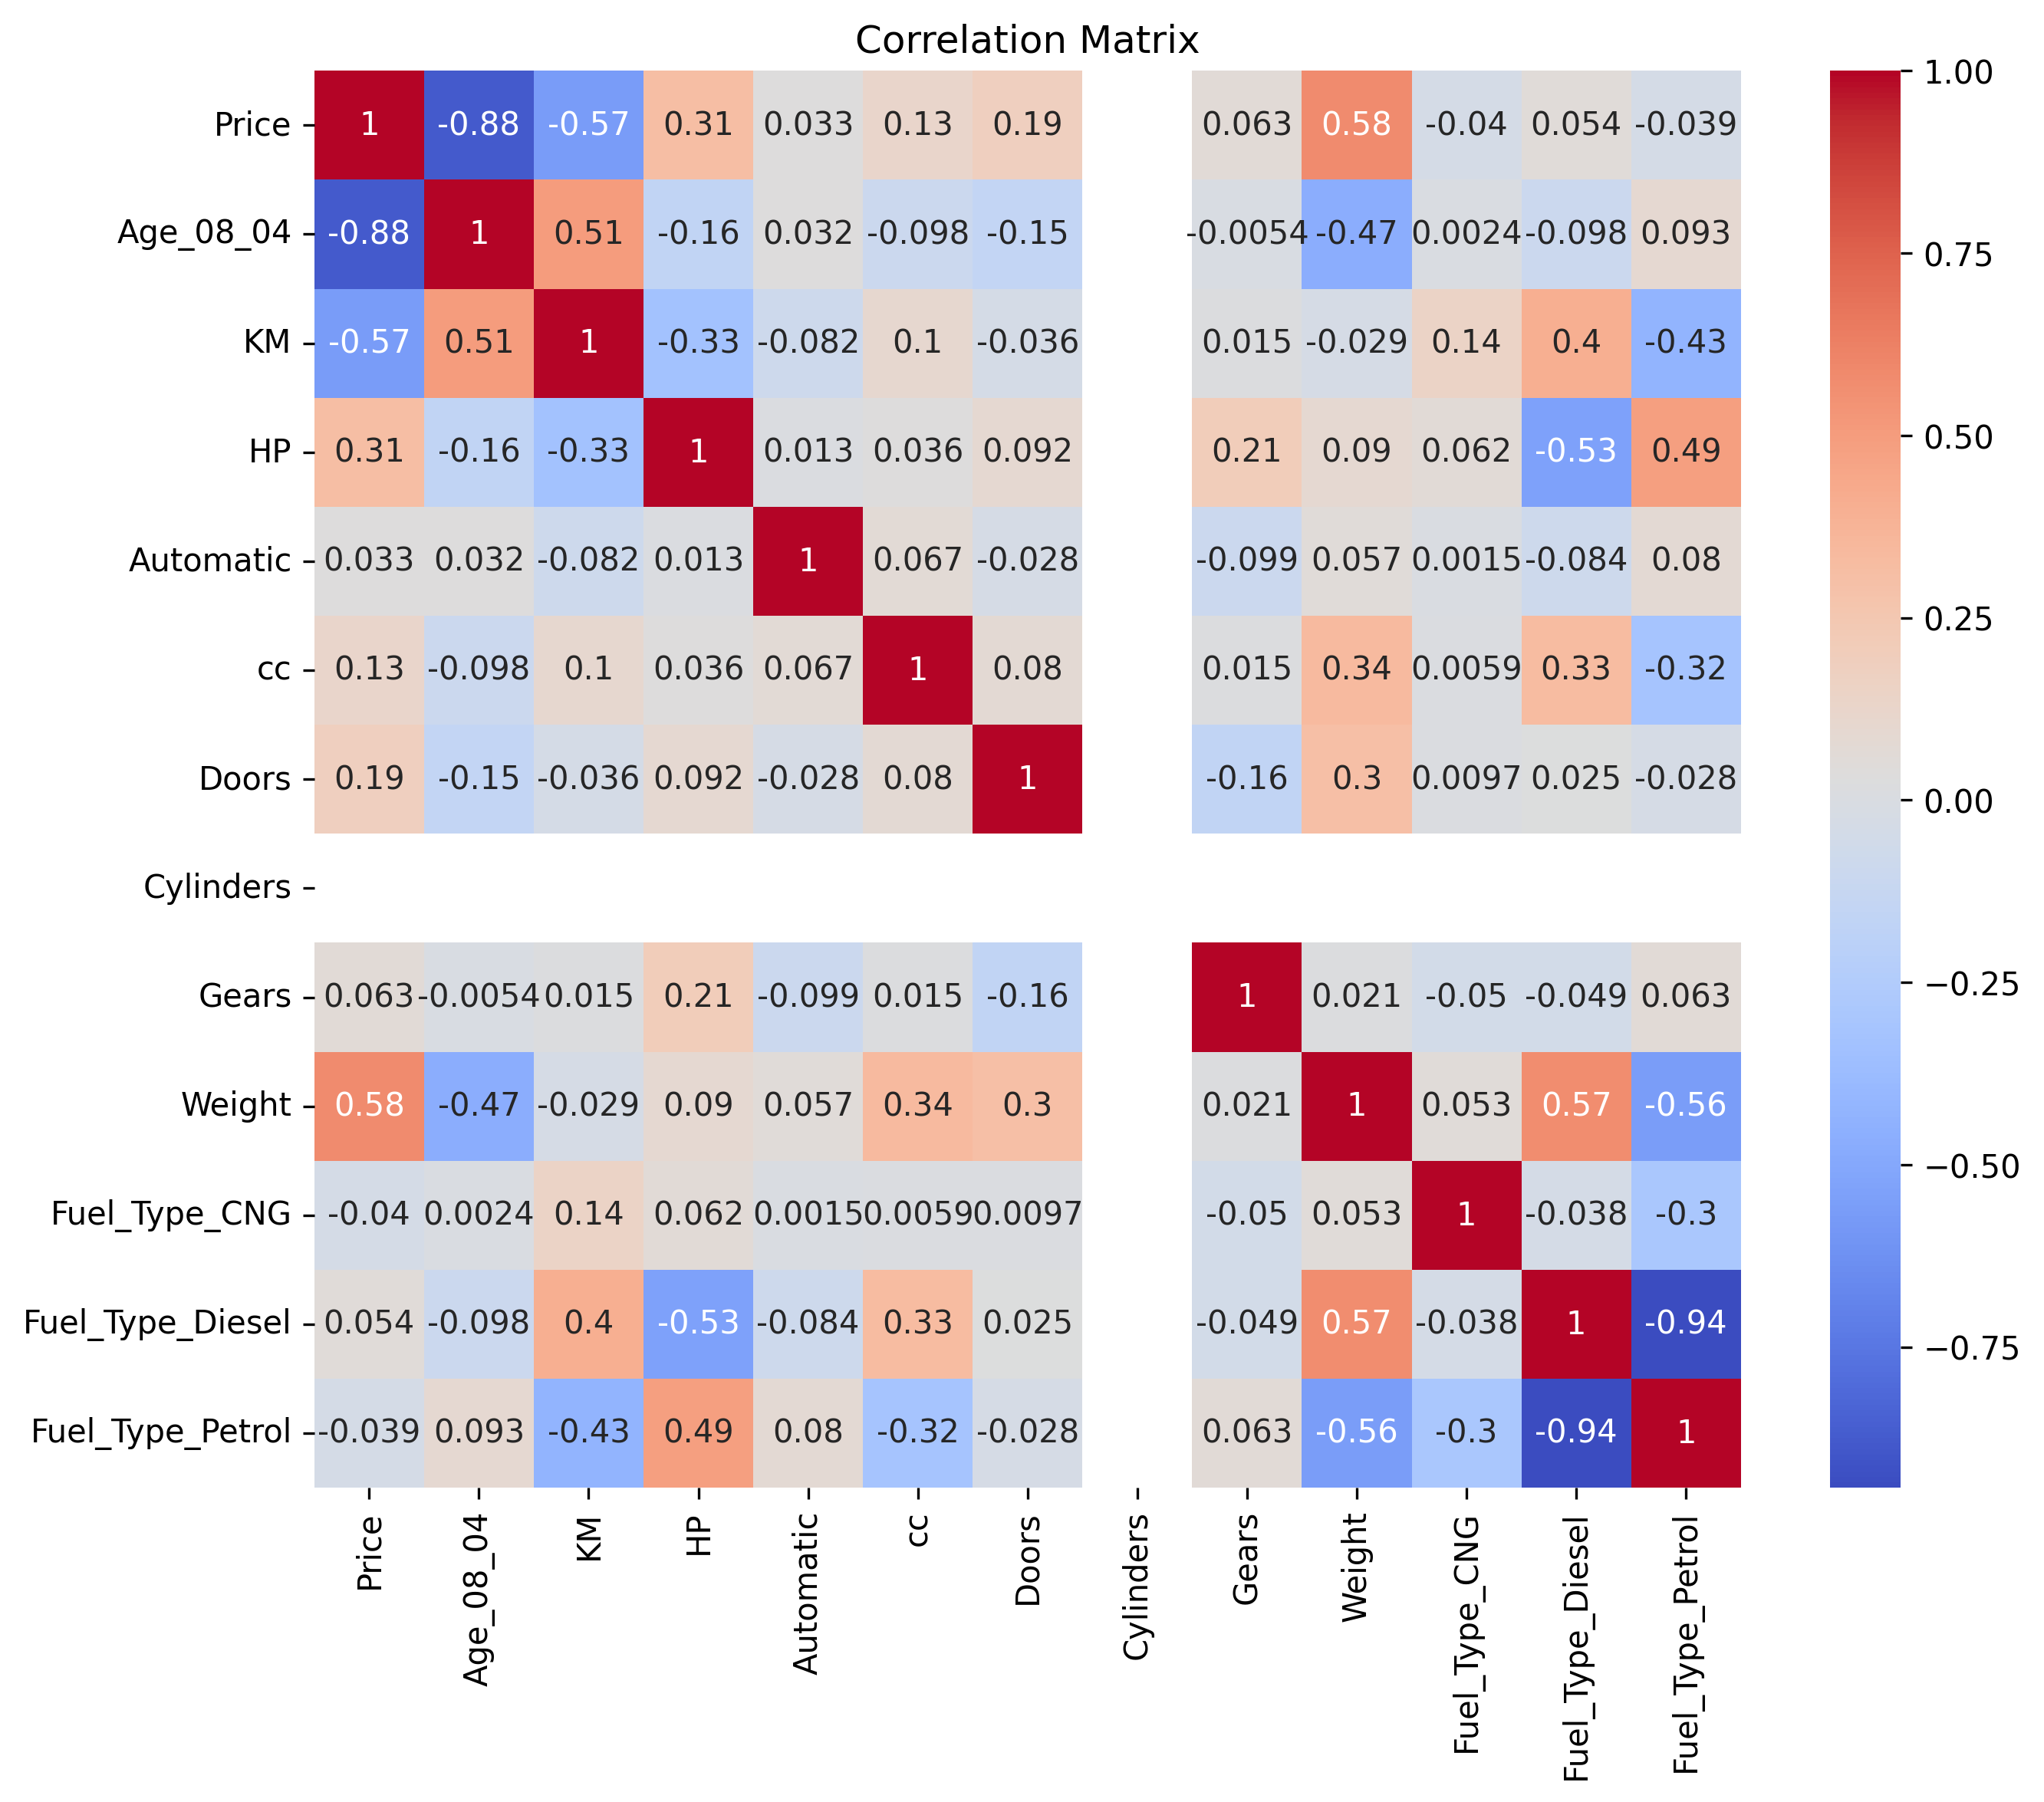

In [9]:
# Pairplot and correlation matrix visualization
sns.pairplot(encoded_df)
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [11]:
# Split the dataset into training and testing sets
X = encoded_df.drop('Price', axis=1)
y = encoded_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Linear Regression model training and prediction
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [13]:
# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)

In [14]:
# Lasso Regression model training and prediction
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [15]:
# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [16]:
# Ridge Regression model training and prediction
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [17]:
# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [18]:
# Output results
print(f"Linear Regression MSE: {mse_lin}, R2: {r2_lin}")
print(f"Lasso Regression MSE: {mse_lasso}, R2: {r2_lasso}")
print(f"Ridge Regression MSE: {mse_ridge}, R2: {r2_ridge}")


Linear Regression MSE: 2203043.8231437006, R2: 0.8348888040611084
Lasso Regression MSE: 2202923.027002638, R2: 0.834897857351427
Ridge Regression MSE: 2202555.890746769, R2: 0.8349253730574889


##Interview Questions:

#### 1.What is Normalization & Standardization and how is it helpful?
**Normalization**: Rescales data to a range of 0 to 1. It's useful for algorithms sensitive to input scale, like K-Nearest Neighbors and Neural Networks.

**Standardization**: Centers data around a mean of 0 with a standard deviation of 1. Ideal for algorithms like linear regression that benefit from normally distributed data.

**Benefits**:
- Enhances model performance by ensuring equal feature contribution.
- Makes features with different scales comparable.
- Reduces bias towards features with larger ranges.



####2.What techniques can be used to address multicollinearity in multiple linear regression?
**Techniques to Address Multicollinearity**:

1. **Variance Inflation Factor (VIF)**: Identify and remove predictors with high VIF values (VIF > 10).
2. **Correlation Matrix**: Use Pearson’s correlation matrix to spot and address highly correlated variables.
3. **Principal Component Analysis (PCA)**: Transform correlated predictors into uncorrelated components.
4. **Regularization (Lasso, Ridge)**: Apply penalties to reduce the impact of multicollinearity by shrinking coefficients.

### **Conclusion**:
Addressing multicollinearity is essential for improving the accuracy and interpretability of multiple linear regression models. Techniques like VIF, correlation matrices, PCA, and regularization help ensure that each predictor's contribution is distinct and measurable, leading to more reliable results. By effectively managing multicollinearity, the model becomes more robust, providing clearer insights and more accurate predictions.